In [14]:
name ="std"

In [15]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

In [16]:

df = pd.read_parquet(f"final_data/{name}/final_data.parquet")

In [4]:
#rename columns with - for _

df.columns = df.columns.str.replace('-','_')
df.drop(["aircraftSerNum_1","cumulative_hasfailed","hasfailed"], axis=1, inplace=True)


In [5]:
X = df.drop(["time_to_failure","date"], axis=1)
y = df["time_to_failure"]

In [6]:
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)


GradientBoostingRegressor()

['cumulative_duration', 'basBleedOverPressF_1a', 'basBleedOverPressF_2b', 'amscHprsovDrivF_2b', 'bleedMonPress_2b']


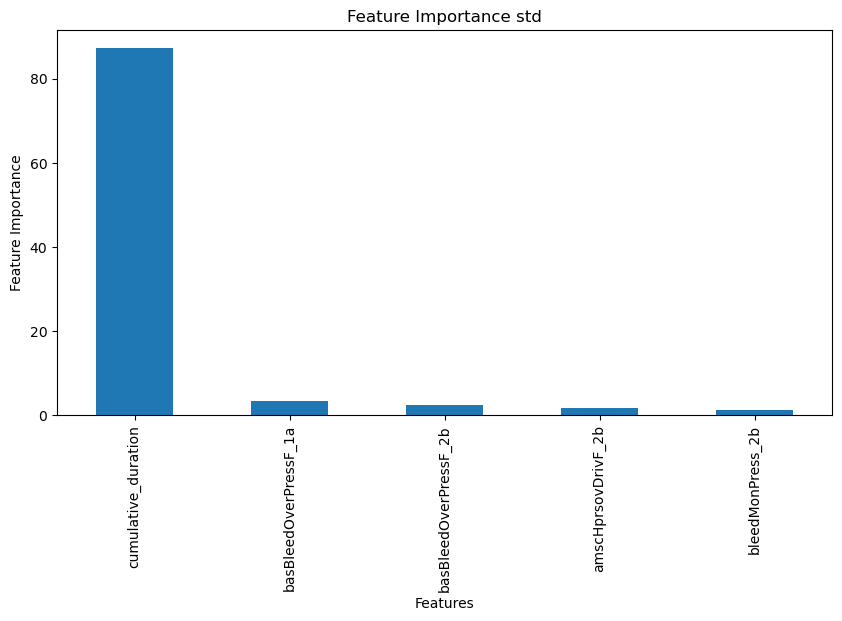

In [8]:
model.feature_importances_
#plot feature importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=False)*100
feat_importances = feat_importances[feat_importances> 1.0]
with open(f"./feature_selection/features_{name}.txt","w") as f:
    print(feat_importances.index.tolist())
    f.write(str(feat_importances.index.tolist()))
    f.close()
feat_importances.plot(kind="bar",title=f"Feature Importance {name}", figsize=(10,5), xlabel="Features", ylabel="Feature Importance")
plt.savefig(f"./feature_importances/feature_importance_{name}.png", dpi=300, bbox_inches='tight')
plt.show()

In [9]:
from sklearn.metrics import mean_absolute_error
y_pred = model.predict(X_test)
emr = mean_absolute_error(y_test, y_pred)
emr_train = mean_absolute_error(y_train, model.predict(X_train))
print(f"Erro médio absoluto: {emr/(60*60*24)}")
print(f"Erro médio absoluto (treino): {emr_train/(60*60*24)}")

Erro médio absoluto: 26.585150749847713
Erro médio absoluto (treino): 25.890145375241467


In [10]:
import pickle
pickle.dump(model, open(f"./models_pickles/model_{name}.pkl", "wb"))
